In [6]:
# print(data['5712'])
# with open("tmp.txt", "w") as f:
#     f.write(data['5712'][1][0])
# with open("tmp1.txt", "w") as f:
#     f.write(data['5712'][1][1])
# for i in data['5712']:
#     print(i)
import json
from sklearn.metrics import recall_score, accuracy_score, f1_score, matthews_corrcoef
def check_predict_labels(file_path, wronglabels_file=None):
    res = {}
    data=json.load(open(file_path))
    #print(len(data))
    y = [ ]
    y_pre = [ ]
    wrong_answer = []
    for values in data.values():
        #print(values)
        chat_answer = values[-1]
        # print(chat_answer)
        if chat_answer == True:
            chat_answer = "true"
        elif chat_answer == False:
            chat_answer = "false"
        else:
            chat_answer = chat_answer.lower()
        # print("========")
        # print(chat_answer)
        if "yes" in chat_answer:#chat_answer.startswith("yes"):
            y_pre.append(1)
        else:
            y_pre.append(0)
        y.append(1 if values[-2] else 0 )
        glable = 1 if values[-2] else 0 
        if glable != y_pre[-1]:
            wrong_answer.append( {"question":"\n".join( [values[1][0], values[1][1]] ), "label": glable} )
    acc = accuracy_score(y,  y_pre)
    f1 = f1_score(y,  y_pre, zero_division=0)
    mcc = matthews_corrcoef(y,  y_pre)
    recall = recall_score(y,  y_pre, zero_division=0)
    res["acc"] = acc
    res["f1"] = f1
    res["mcc"] = mcc
    res["recall"] = recall
    res["y"] = y
    res["y_pre"] = y_pre
    res["Number"] = len(y)
    print(f" Pos {sum(y_pre)} Neg {len(y_pre)-sum(y_pre)} ACC {acc} F1 {f1} MCC {mcc} Recall {recall}")
    print(f" Pos {sum(y)} Neg {len(y)-sum(y)}")
    if wronglabels_file:
        json.dump(wrong_answer,open(wronglabels_file,'w'), indent=4)
    return res
    
    # print(y)


# check_predict_labels("datasets/solidity_src/0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258/facts_contract_sample_50_chatgptanswers_taint.json")    
    

In [ ]:
import os
os.chdir('all_datasets/dp_taint/GPT3.5')
print(os.getcwd())

In [ ]:
projects= [
        "0x1887118e49e0f4a78bd71b792a49de03504a764d",
        "0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258",
        "0x4e68ccd3e89f51c3074ca5072bbac773960dfa36",
        # "0x7efaef62fddcca950418312c6c91aef321375a00",
        "0xb8919522331c59f5c16bdfaa6a121a6e03a91f62",
        "0xe0570ddfca69e5e90d83ea04bb33824d3bbe6a85",
        # "alpha-lending-smart-contract",
        "AMP",
        "defi-sdk",
        "DFX",
        "JAY",
        "n00dToken",
        "Orion",
        "Rari",
        "visor",
]
res = [ ]
y = []
y_pre = []
for project in projects:
         r = check_predict_labels(f"{project}/facts_contract_sample_50_chatgptanswers_dp.json",wronglabels_file= f"{project}/wrong_facts_contract_sample_50_chatgptanswers_dp.json")
         r['project'] = project[:6] if project.startswith("0x") else project.split("-")[0]
         y += r['y']
         y_pre += r['y_pre']
         res.append(r)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame.from_records(res)
plt.figure(figsize=(16,8))
sns.barplot(df, x='project', y='f1', alpha=0.8)
plt.xticks(rotation=80, fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Project', fontsize=24)
plt.ylabel('F1', fontsize=24)
plt.tight_layout()
plt.savefig('data_dep_prediction.pdf')

acc = accuracy_score(y,  y_pre)
f1 = f1_score(y,  y_pre)
mcc = matthews_corrcoef(y,  y_pre)
recall = recall_score(y,  y_pre)
print(f"Total Pos {sum(y)} Neg {len(y)-sum(y)} ACC {acc} F1 {f1} MCC {mcc} Recall {recall}")


In [4]:
df_dep=df

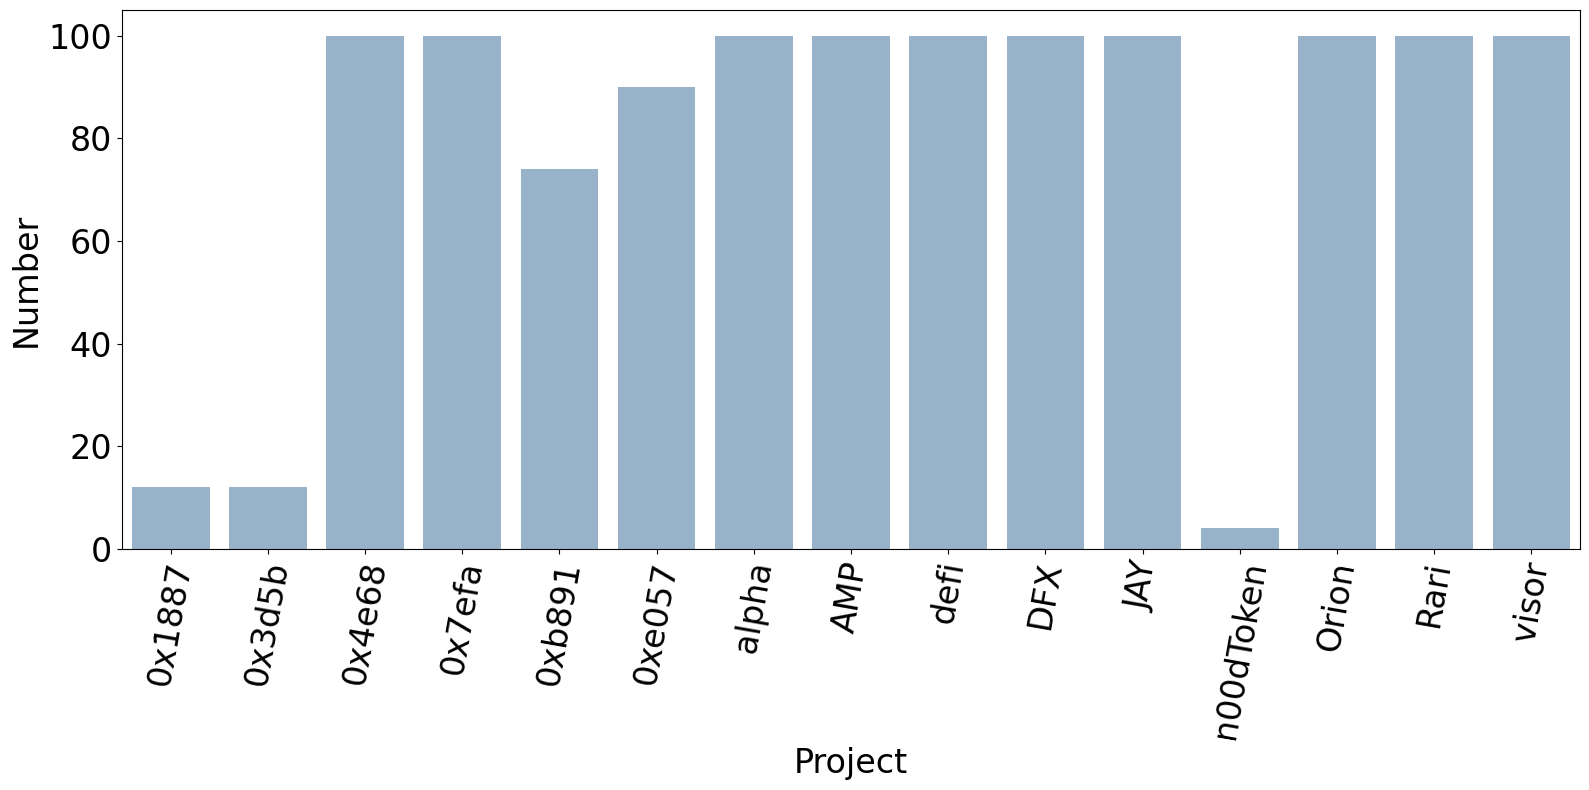

In [5]:
# number of datapoint distributed among projects
plt.figure(figsize=(16,8))
sns.barplot(df, x='project', y='Number', color='steelblue',  alpha  = 0.6)
plt.xticks(rotation=80, fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Project', fontsize=24)
plt.ylabel('Number', fontsize=24)
plt.tight_layout()
plt.savefig('data_dep_num.pdf')

In [6]:
projects_tmp = ["0x4e68ccd3e89f51c3074ca5072bbac773960dfa36"]

 Pos 3 Neg 7 ACC 0.6 F1 0.5 MCC 0.2182178902359924 Recall 0.4
 Pos 5 Neg 5
 Pos 30 Neg 10 ACC 0.55 F1 0.64 MCC 0.11547005383792516 Recall 0.8
 Pos 20 Neg 20
 Pos 0 Neg 50 ACC 1.0 F1 0.0 MCC 0.0 Recall 0.0
 Pos 0 Neg 50
 Pos 29 Neg 55 ACC 0.6309523809523809 F1 0.5633802816901408 MCC 0.2754306972098739 Recall 0.47619047619047616
 Pos 42 Neg 42
 Pos 21 Neg 27 ACC 0.7291666666666666 F1 0.7111111111111111 MCC 0.46195657812238883 Recall 0.6666666666666666
 Pos 24 Neg 24
 Pos 6 Neg 12 ACC 0.8333333333333334 F1 0.8 MCC 0.7071067811865475 Recall 0.6666666666666666
 Pos 9 Neg 9
 Pos 62 Neg 38 ACC 0.56 F1 0.6071428571428571 MCC 0.12361284651454937 Recall 0.68
 Pos 50 Neg 50
 Pos 32 Neg 68 ACC 0.7 F1 0.6341463414634146 MCC 0.4287464628562721 Recall 0.52
 Pos 50 Neg 50
 Pos 63 Neg 37 ACC 0.69 F1 0.7256637168141592 MCC 0.3935341851340934 Recall 0.82
 Pos 50 Neg 50
 Pos 11 Neg 89 ACC 0.59 F1 0.32786885245901637 MCC 0.28764124744526687 Recall 0.2
 Pos 50 Neg 50
 Pos 6 Neg 68 ACC 0.527027027027027 F1 0

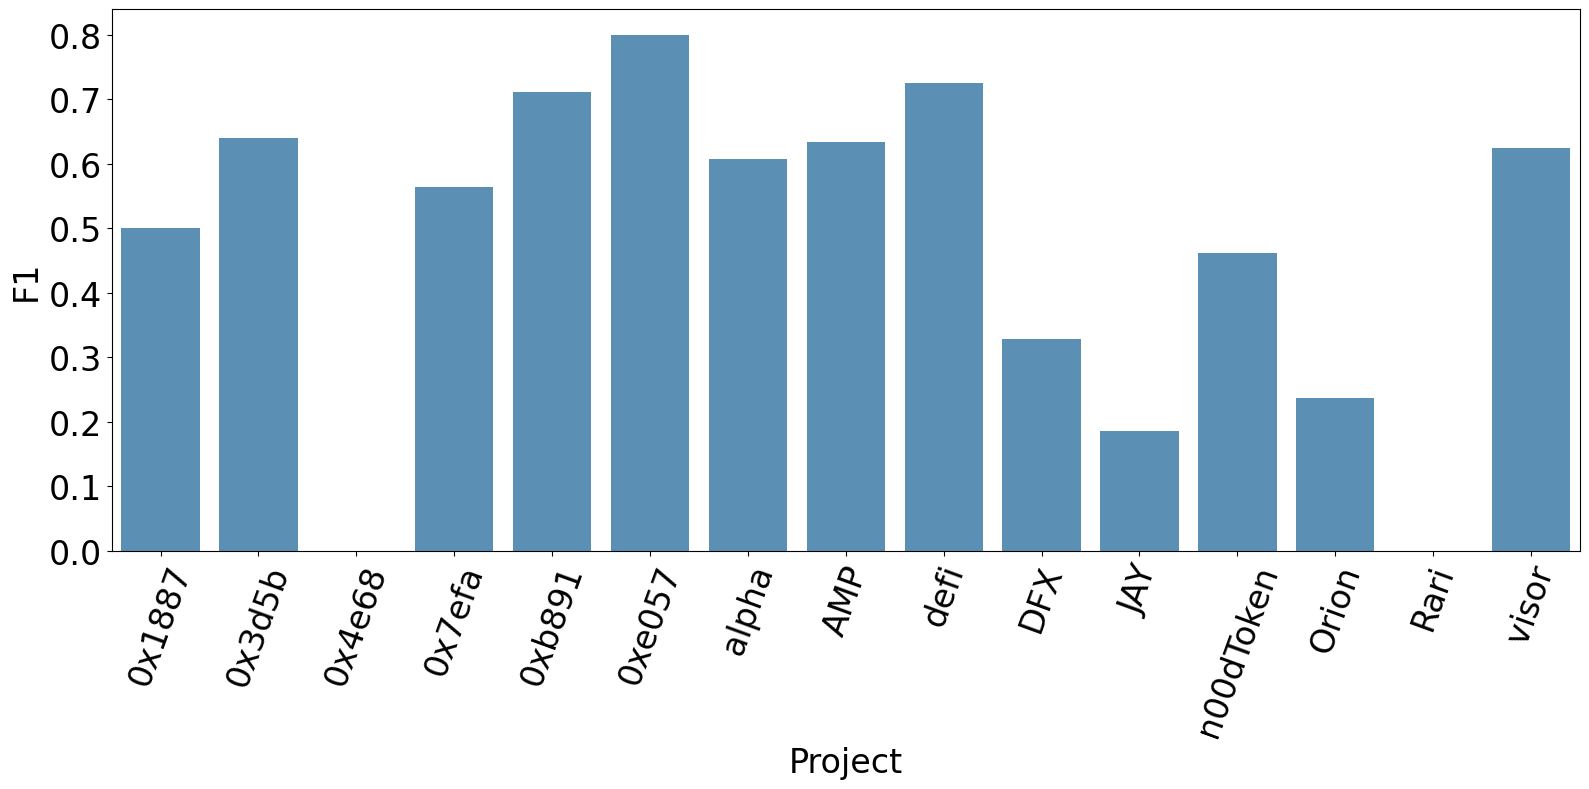

In [7]:
res = [ ]
y = []
y_pre = []
for project in projects:
    r = check_predict_labels(f"{project}/formatted/facts_contract_sample_50_taint.json", wronglabels_file=f"{project}/formatted/wrong_facts_contract_sample_50_taint.json")
    r['project'] = project[:6] if project.startswith("0x") else project.split("-")[0]
    y += r['y']
    y_pre += r['y_pre']
    res.append(r)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame.from_records(res)
plt.figure(figsize=(16,8))
sns.barplot(df, x='project', y='f1',  alpha  = 0.8)
plt.xticks(rotation=70, fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Project', fontsize=24)
plt.ylabel('F1', fontsize=24)
plt.tight_layout()

plt.savefig('data_taint_prediction.pdf')

acc = accuracy_score(y,  y_pre)
f1 = f1_score(y,  y_pre)
mcc = matthews_corrcoef(y,  y_pre)
recall = recall_score(y,  y_pre)
print(f"Total Pos {sum(y)} Neg {len(y)-sum(y)} ACC {acc} F1 {f1} MCC {mcc} Recall {recall}")

[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25]


/tmp/ipykernel_273847/1390596931.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([round(abs(tick),2) for tick in ticks], fontsize=38)


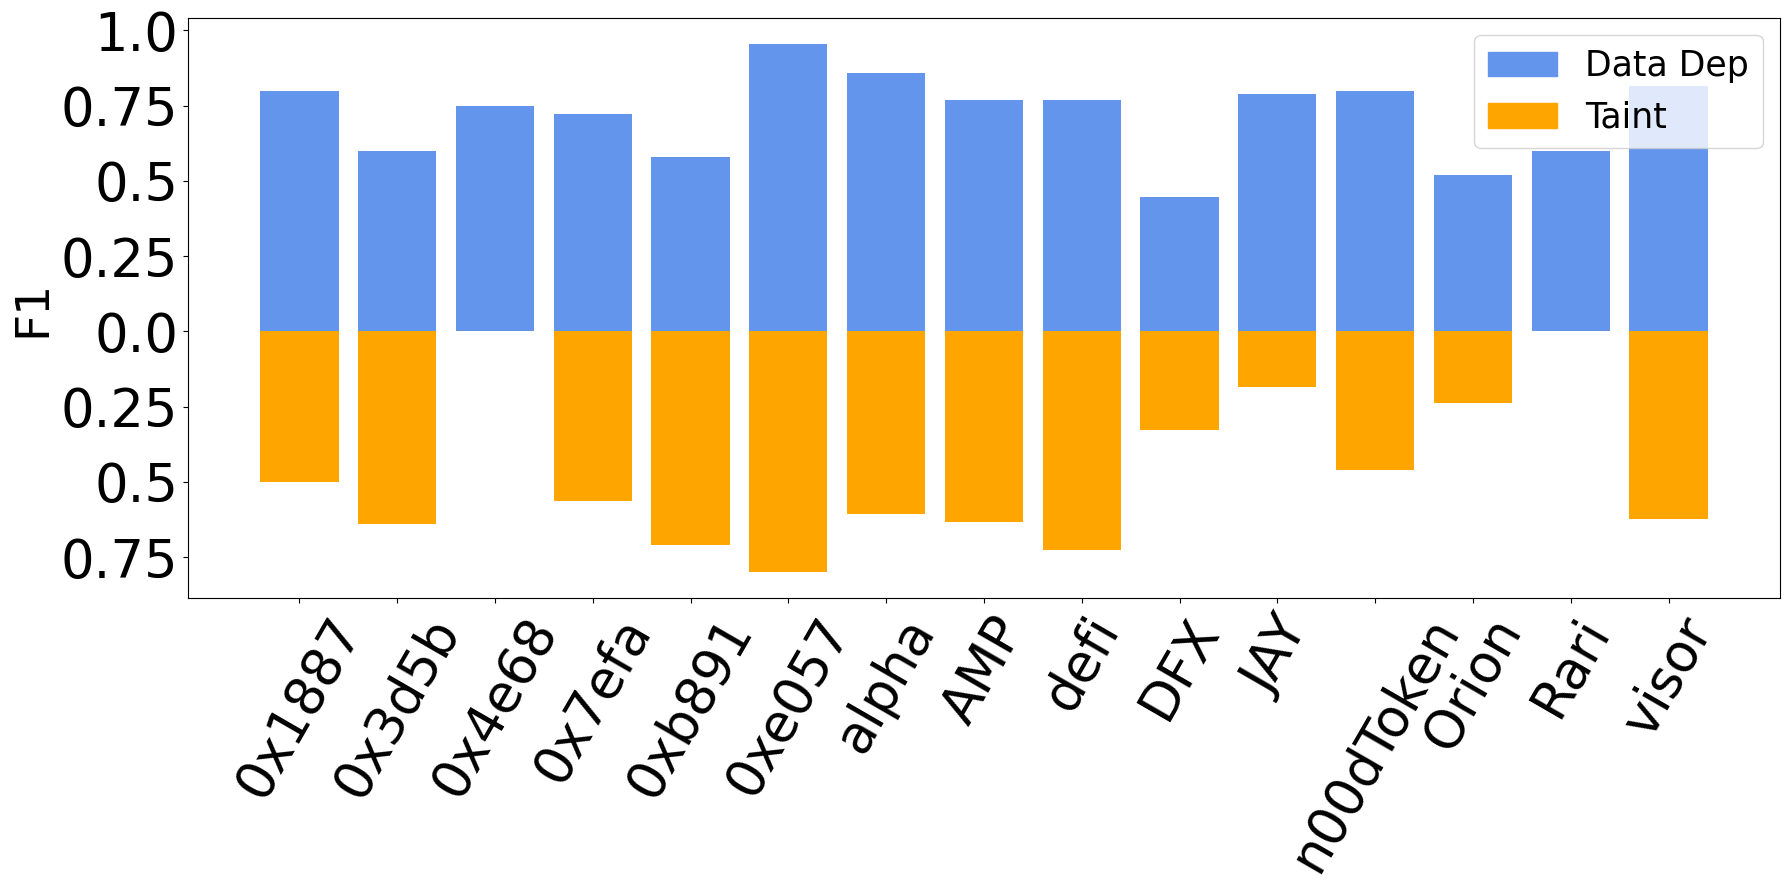

In [8]:
df_taint = df
x = df_dep["project"].to_list()
fig, ax = plt.subplots(figsize=(18,9))
dep_y = df_dep["f1"].to_list()
taint_y = df_taint["f1"].to_list()
ax.bar(x, dep_y,  color="cornflowerblue")
ax.bar(x, [ i*-1 for i in taint_y ], color="orange" )

# Formatting x labels
plt.xticks(rotation=60, fontsize=38)
#plt.xlabel('Project', fontsize=30)
plt.ylabel('F1', fontsize=34)
plt.tight_layout()
# Use absolute value for y-ticks
ticks =  ax.get_yticks()
print(ticks)
ax.set_yticklabels([round(abs(tick),2) for tick in ticks], fontsize=38)
colors = {'Data Dep':'cornflowerblue', 'Taint':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, fontsize=25)
plt.tight_layout()
plt.savefig('data_taint_dep_merged.pdf')

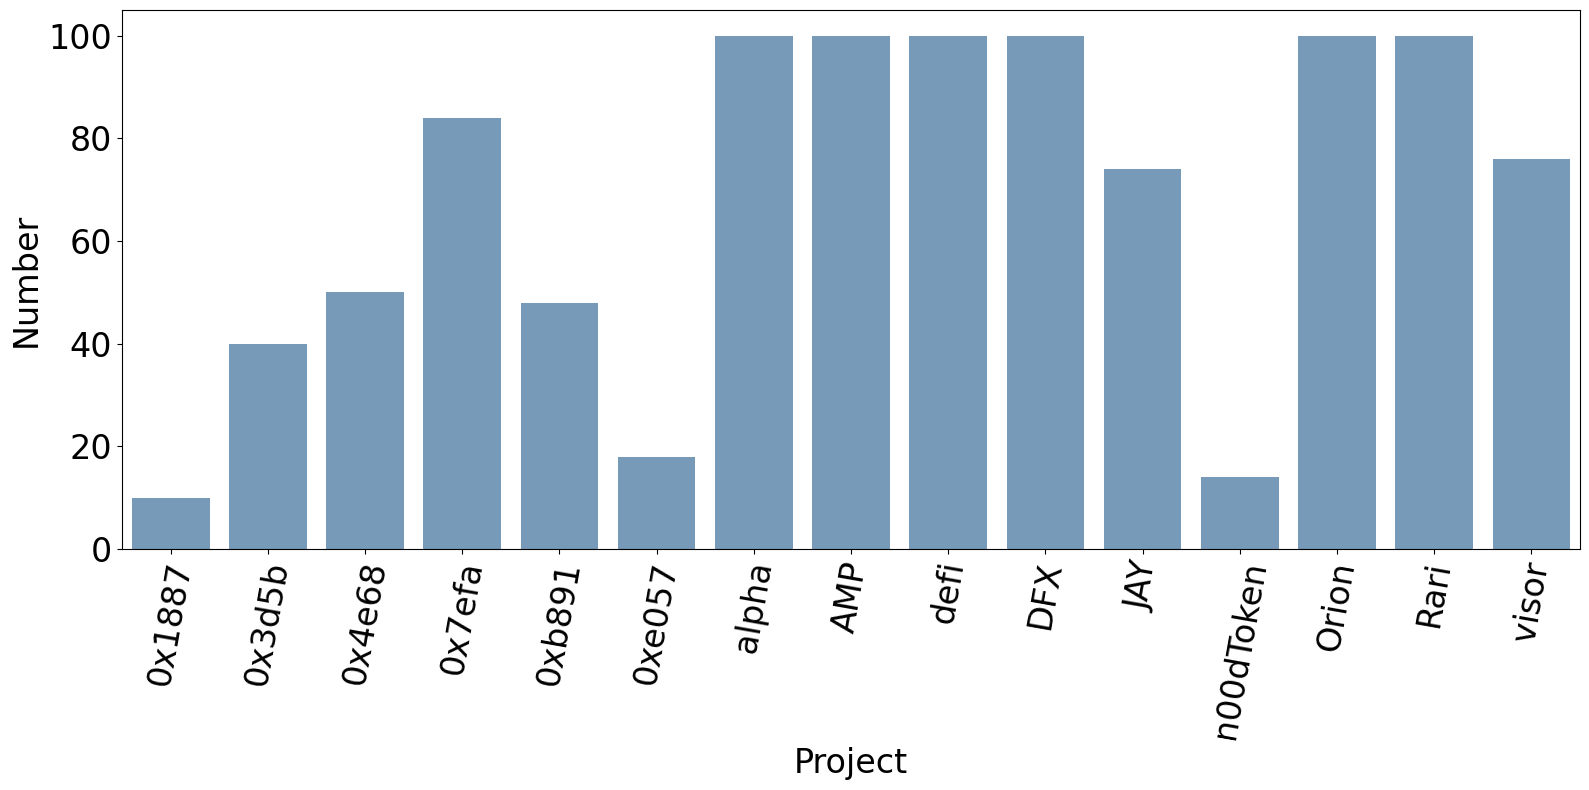

In [9]:
# number of datapoint distributed among projects
plt.figure(figsize=(16,8))
sns.barplot(df, x='project', y='Number', color='steelblue',  alpha  = 0.8)
plt.xticks(rotation=80, fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Project', fontsize=24)
plt.ylabel('Number', fontsize=24)
plt.tight_layout()
plt.savefig('data_taint_num.pdf')

In [ ]:
projects= [
        "0x1887118e49e0f4a78bd71b792a49de03504a764d",
        "0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258",
        "0x4e68ccd3e89f51c3074ca5072bbac773960dfa36",
        "0x7efaef62fddcca950418312c6c91aef321375a00",
        "0xb8919522331c59f5c16bdfaa6a121a6e03a91f62",
        "0xe0570ddfca69e5e90d83ea04bb33824d3bbe6a85",
        "alpha-lending-smart-contract",
        "AMP",
        "defi-sdk",
        "DFX",
        "JAY",
        "n00dToken",
        "Orion",
        "Rari",
        "visor",
        ]

res = []
for project in projects:
        r = check_predict_labels(f"{project}/formatted/facts_function_sample_50_dp.json")
        r['project'] = project[:6] if project.startswith("0x") else project.split("-")[0]
        res.append(r)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame.from_records(res)
plt.figure()
sns.barplot(df, x='project', y='f1', alpha=0.7)
plt.xticks(rotation=70, fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel('F1', fontsize=16)
plt.ylabel('Project', fontsize=16)
plt.tight_layout()
        

In [ ]:
projects= [
        "0x1887118e49e0f4a78bd71b792a49de03504a764d",
        "0x3d5bc3c8d13dcb8bf317092d84783c2697ae9258",
        "0x4e68ccd3e89f51c3074ca5072bbac773960dfa36",
        "0x7efaef62fddcca950418312c6c91aef321375a00",
        "0xb8919522331c59f5c16bdfaa6a121a6e03a91f62",
        "0xe0570ddfca69e5e90d83ea04bb33824d3bbe6a85",
        "alpha-lending-smart-contract",
        "AMP",
        "defi-sdk",
        "DFX",
        "JAY",
        "n00dToken",
        "Orion",
        "Rari",
        "visor",
        ]

res = []
for project in projects:
        r = check_predict_labels(f"{project}/formatted/facts_function_sample_50_taint.json")
        r['project'] = project[:6] if project.startswith("0x") else project.split("-")[0]
        res.append(r)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame.from_records(res)
plt.figure()
sns.barplot(df, x='project', y='f1')
plt.xticks(rotation=70, fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel('Project', fontsize=16)
plt.ylabel('F1', fontsize=16)
plt.tight_layout()
        

In [ ]:
import os
os.chdir('all_datasets/dp_taint')
print(os.getcwd())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 
data = {
    "ACC": [0.56, 0.59],  # 
    "MCC": [0.12, 0.18],  # 
    "F1": [0.44, 0.39]    # F1
}

confusion_matrix = pd.DataFrame(
    data,
    index=["Data Dependency", "Taint Analysis"]
)

# 
fig, ax = plt.subplots(figsize=(15, 3))  # 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=confusion_matrix.values, colLabels=confusion_matrix.columns,
                 rowLabels=confusion_matrix.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)  # 
table.scale(1, 2)  # 

plt.savefig('performance_codellama.png')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# ACC 0.5302013422818792 F1 0.6033994334277621 MCC 0.0649925383220792 Recall 0.714765100671141
# ACC 0.5700197238658777 F1 0.4669926650366748 MCC 0.13482852032005688 Recall 0.3921971252566735
# 
data = {
    "ACC": [0.53, 0.57],  # 
    "MCC": [0.06, 0.13],  # 
    "F1": [0.60, 0.47]    # F1
}

confusion_matrix = pd.DataFrame(
    data,
    index=["Data Dependency", "Taint Analysis"]
)

# 
fig, ax = plt.subplots(figsize=(15, 3))  # 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=confusion_matrix.values, colLabels=confusion_matrix.columns,
                 rowLabels=confusion_matrix.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)  # 
table.scale(1, 2)  # 

plt.savefig('performance_starchat.png')
plt.show()


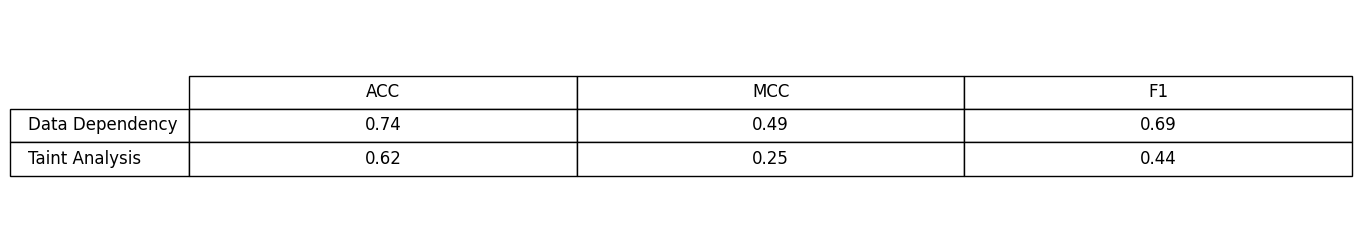

In [10]:
# ACC 0.7416107382550335 F1 0.7283950617283951 MCC 0.4855259825079646 Recall 0.6929530201342282
# ACC 0.6232741617357002 F1 0.5236907730673316 MCC 0.24598240400814642 Recall 0.43568464730290457import pandas as pd
import matplotlib.pyplot as plt
# 
data = {
    "ACC": [0.74, 0.62],  # 
    "MCC": [0.49, 0.25],  # 
    "F1": [0.69, 0.44]    # F1
}

confusion_matrix = pd.DataFrame(
    data,
    index=["Data Dependency", "Taint Analysis"]
)

# 
fig, ax = plt.subplots(figsize=(15, 3))  # 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=confusion_matrix.values, colLabels=confusion_matrix.columns,
                 rowLabels=confusion_matrix.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)  # 
table.scale(1, 2)  # 

plt.savefig('performance_gpt4.png')
plt.show()
